***Import Libraries***

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForestRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# dark theme
plt.style.use('dark_background')
sns.set_theme(style='darkgrid')
%matplotlib inline

print('Libraries loaded. Dark plotting style set.')              

Libraries loaded. Dark plotting style set.


***Load and Inspect Data***

In [5]:
data1 = pd.read_csv('C:\\Users\\adele\\Downloads\\covid-19 3mtt project\\day_wise.csv')
data1.head()
data1.info()
data1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
count,1.880000e+02,188.000000,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06,87771.021277,3478.824468,50362.015957,4.860638,34.343936,22.104521,144.351064
std,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06,75295.293255,2537.735652,56090.892479,1.579541,16.206159,22.568307,65.175979
min,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,2.040000,1.710000,6.260000,6.000000
25%,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04,5568.500000,250.750000,2488.250000,3.510000,22.785000,9.650000,101.250000
50%,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06,81114.000000,4116.000000,30991.500000,4.850000,35.680000,15.380000,184.000000
75%,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06,131502.500000,5346.000000,79706.250000,6.297500,48.945000,25.342500,187.000000
max,1.648048e+07,654036.000000,9.468087e+06,6.358362e+06,282756.000000,9966.000000,284394.000000,7.180000,57.450000,134.430000,187.000000


In [6]:
data2 = pd.read_csv('C:\\Users\\adele\\Downloads\\covid-19 3mtt project\\full_grouped.csv')
data2.head()
data2.info()
data2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


In [7]:
data3 = pd.read_csv('C:\\Users\\adele\\Downloads\\covid-19 3mtt project\\usa_county_wise.csv')
data3.head()
data3.info()
data3.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627920 entries, 0 to 627919
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             627920 non-null  int64  
 1   iso2            627920 non-null  object 
 2   iso3            627920 non-null  object 
 3   code3           627920 non-null  int64  
 4   FIPS            626040 non-null  float64
 5   Admin2          626792 non-null  object 
 6   Province_State  627920 non-null  object 
 7   Country_Region  627920 non-null  object 
 8   Lat             627920 non-null  float64
 9   Long_           627920 non-null  float64
 10  Combined_Key    627920 non-null  object 
 11  Date            627920 non-null  object 
 12  Confirmed       627920 non-null  int64  
 13  Deaths          627920 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 67.1+ MB


,UID,code3,FIPS,Lat,Long_,Confirmed,Deaths
count,6.279200e+05,627920.000000,626040.000000,627920.000000,627920.000000,627920.000000,627920.000000
mean,8.342958e+07,834.491617,33061.684685,36.707212,-88.601474,357.284285,17.536328
std,4.314702e+06,36.492620,18636.156825,9.061572,21.715747,3487.282694,300.991466
min,1.600000e+01,16.000000,60.000000,-14.271000,-174.159600,0.000000,0.000000
25%,8.401811e+07,840.000000,19079.000000,33.895587,-97.790204,0.000000,0.000000
50%,8.402921e+07,840.000000,31014.000000,38.002344,-89.486710,4.000000,0.000000
75%,8.404612e+07,840.000000,47131.000000,41.573069,-82.311265,63.000000,1.000000
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,224051.000000,23500.000000


In [8]:
data4 = pd.read_csv('C:\\Users\\adele\\Downloads\\covid-19 3mtt project\\worldometer_data.csv')
data4.head()
data4.info()
data4.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,2.090000e+02,4.000000,188.000000,3.000000,2.050000e+02,3.000000,2.050000e+02,122.000000,208.000000,187.000000,1.910000e+02,191.000000
mean,3.041549e+07,9.171850e+04,1980.500000,3792.590426,300.000000,5.887898e+04,1706.000000,2.766433e+04,534.393443,3196.024038,98.681176,1.402405e+06,83959.366492
std,1.047661e+08,4.325867e+05,3129.611424,15487.184877,451.199512,2.566984e+05,2154.779803,1.746327e+05,2047.518613,5191.986457,174.956862,5.553367e+06,152730.591240
min,8.010000e+02,1.000000e+01,20.000000,1.000000,1.000000,7.000000e+00,42.000000,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,9.663140e+05,7.120000e+02,27.500000,22.000000,40.500000,3.340000e+02,489.000000,8.600000e+01,3.250000,282.000000,6.000000,2.575200e+04,8956.500000
50%,7.041972e+06,4.491000e+03,656.000000,113.000000,80.000000,2.178000e+03,936.000000,8.990000e+02,27.500000,1015.000000,29.000000,1.357020e+05,32585.000000
75%,2.575614e+07,3.689600e+04,2609.000000,786.000000,449.500000,2.055300e+04,2538.000000,7.124000e+03,160.250000,3841.750000,98.000000,7.576960e+05,92154.500000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


In [9]:
data5 = pd.read_csv('C:\\Users\\adele\\Downloads\\covid-19 3mtt project\\country_wise_latest.csv')
data5.head()
data5.info()
data5.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [10]:
data6 = pd.read_csv('C:\\Users\\adele\\Downloads\\covid-19 3mtt project\\covid_19_clean_complete.csv')
data6.head()
data6.info()
data6.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


***Clean the Data***

In [11]:
data1.drop_duplicates(inplace=True)
data1.fillna(0, inplace=True)

In [12]:
data2.drop_duplicates(inplace=True)
data2.fillna(0, inplace=True)

In [13]:
data3.drop_duplicates(inplace=True)
data3.fillna(0, inplace=True)

In [14]:
data4.drop_duplicates(inplace=True)
data4.fillna(0, inplace=True)

In [15]:
data5.drop_duplicates(inplace=True)
data5.fillna(0, inplace=True)

In [16]:
data6.drop_duplicates(inplace=True)
data6.fillna(0, inplace=True)

***Basic Inspection Helper***

In [17]:
def basic_info(df, name):
    if df is None:
        print(name, 'is None')
        return
    print('\n' + '='*8 + f' {name} ' + '='*8)
    print('shape:', df.shape)
    print('columns:', df.columns.tolist())
    print('\nmissing values (top 10):')
    display(df.isnull().sum().sort_values(ascending=False).head(10))

basic_info(data1, 'data1')
basic_info(data2, 'data2')
basic_info(data3, 'data3')
basic_info(data4, 'data4')
basic_info(data5, 'data5')
basic_info(data6, 'data6')


======== data1 ========
shape: (188, 12)
columns: ['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries']

missing values (top 10):


Date                     0
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
New cases                0
New deaths               0
New recovered            0
Deaths / 100 Cases       0
Recovered / 100 Cases    0
dtype: int64


======== data2 ========
shape: (35156, 10)
columns: ['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'WHO Region']

missing values (top 10):


Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64


======== data3 ========
shape: (627920, 14)
columns: ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Date', 'Confirmed', 'Deaths']

missing values (top 10):


UID               0
iso2              0
iso3              0
code3             0
FIPS              0
Admin2            0
Province_State    0
Country_Region    0
Lat               0
Long_             0
dtype: int64


======== data4 ========
shape: (209, 16)
columns: ['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop', 'WHO Region']

missing values (top 10):


Country/Region    0
Continent         0
Population        0
TotalCases        0
NewCases          0
TotalDeaths       0
NewDeaths         0
TotalRecovered    0
NewRecovered      0
ActiveCases       0
dtype: int64


======== data5 ========
shape: (187, 15)
columns: ['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'Confirmed last week', '1 week change', '1 week % increase', 'WHO Region']

missing values (top 10):


Country/Region           0
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
New cases                0
New deaths               0
New recovered            0
Deaths / 100 Cases       0
Recovered / 100 Cases    0
dtype: int64


======== data6 ========
shape: (49068, 10)
columns: ['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'WHO Region']

missing values (top 10):


Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

***Convert Dates & Standardize***

In [18]:
def convert_dates_and_standardize(df, name):
    if df is None:
        return df
    for c in df.columns:
        if 'date' in c.lower() or c.lower() in ['date','reported_date','observationdate','last_update']:
            try:
                df[c] = pd.to_datetime(df[c], errors='coerce')
                print(f'Converted {name}.{c} to datetime')
            except Exception:
                pass
    return df

data1 = convert_dates_and_standardize(data1, 'data1')
data2= convert_dates_and_standardize(data2, 'data2')
data3 = convert_dates_and_standardize(data3, 'data3')
data4 = convert_dates_and_standardize(data4, 'data4')
data5 = convert_dates_and_standardize(data5, 'data5')
data6 = convert_dates_and_standardize(data6, 'data6')

if data4 is not None:
    if 'Country_Region' in data4.columns and 'Country/Region' not in data4.columns:
        data4.rename(columns={'Country_Region':'Country/Region'}, inplace=True)
    if 'Country' in data4.columns and 'Country/Region' not in data4.columns:
        data4.rename(columns={'Country':'Country/Region'}, inplace=True)
    print('Standardized some data4 column names (if present)')
    

Converted data1.Date to datetime
Converted data2.Date to datetime
Converted data3.Date to datetime
Converted data6.Date to datetime
Standardized some data4 column names (if present)


C:\Users\adele\AppData\Local\Temp\ipykernel_27192\3898121710.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[c] = pd.to_datetime(df[c], errors='coerce')


***Data Preprocessing Expansion***

In [19]:
# Data Cleaning Summary
# - Drop duplicate rows
# - Handle missing values
# - Convert date columns
# - Standardize numeric types

# Example:
for df in [data4, data3, data2, data5, data6]:
    if df is not None:
        df.drop_duplicates(inplace=True)
        df.fillna(0, inplace=True)
print("Data cleaned and standardized")

Data cleaned and standardized


***Feature Engineering & Save Samples***

In [20]:
if data4 is not None:
    if 'TotalCases' in data4.columns and 'TotalDeaths' in data4.columns:
        data4['Mortality_Rate'] = data4['TotalDeaths'] / data4['TotalCases'].replace({0: np.nan})
    if 'TotalCases' in data4.columns and 'Population' in data4.columns:
        data4['Cases_per_Million'] = data4['TotalCases'] / (data4['Population'].replace({0: np.nan})/1_000_000)
    print('Derived columns added(Mortality_Rate, Cases_per_Million)')

for name, df in [('data4', data4), ('data3', data3), ('data1', data1), ('data2', data2), ('data5', data5), ('data6', data6)]:
    if df is not None:
        try:
            df.head(200).to_csv(os.path.join(OUTPUT_DIR, f"{name}_sample.csv"), index=False)
        except Exception as e:
            print('Could not save sample for', name, e)
print('Saved sample CSVs to outputs folder')

import os

# Automatically detect your current notebook folder
NOTEBOOK_DIR = os.getcwd()

# Create a subfolder named "outputs" if it doesn't exist
OUTPUT_DIR = os.path.join(NOTEBOOK_DIR, "outputs")
os.makedirs(OUTPUT_DIR, exist_ok=True)

print("All plots and CSVs will be saved to:", OUTPUT_DIR)

# Define the path to your summary file
summary_path = os.path.join(OUTPUT_DIR, "quick_summary.txt")

print("Summary file path:", summary_path)    

Derived columns added(Mortality_Rate, Cases_per_Million)
Could not save sample for data4 name 'os' is not defined
Could not save sample for data3 name 'os' is not defined
Could not save sample for data1 name 'os' is not defined
Could not save sample for data2 name 'os' is not defined
Could not save sample for data5 name 'os' is not defined
Could not save sample for data6 name 'os' is not defined
Saved sample CSVs to outputs folder
All plots and CSVs will be saved to: C:\Users\adele\outputs
Summary file path: C:\Users\adele\outputs\quick_summary.txt


***More Feature Engineering***

In [21]:
# Daily growth rate (for time series insight)
if 'Confirmed' in data2.columns:
    data2['Daily_Growth_Rate'] = data2['Confirmed'].pct_change().fillna(0)

# Active cases (total - deaths - recovered)
if {'Confirmed','Deaths','Recovered'}.issubset(data2.columns):
    data2['Active_Cases'] = data2['Confirmed'] - (data2['Deaths'] + data2['Recovered'])


for name, df in [('data4', data4), ('data3', data3), ('data1', data1), ('data2', data2), ('data5', data5), ('data6', data6)]:
    if df is not None:
        try:
            df.head(200).to_csv(os.path.join(OUTPUT_DIR, f"{name}_sample.csv"), index=False)
        except Exception as e:
            print('Could not save sample for', name, e)
print('Saved sample CSVs to outputs folder')

import os

# Automatically detect your current notebook folder
NOTEBOOK_DIR = os.getcwd()

# Create a subfolder named "outputs" if it doesn't exist
OUTPUT_DIR = os.path.join(NOTEBOOK_DIR, "outputs")
os.makedirs(OUTPUT_DIR, exist_ok=True)

print("All plots and CSVs will be saved to:", OUTPUT_DIR)

# Define the path to your summary file
summary_path = os.path.join(OUTPUT_DIR, "quick_summary.txt")

print("Summary file path:", summary_path)    

Saved sample CSVs to outputs folder
All plots and CSVs will be saved to: C:\Users\adele\outputs
Summary file path: C:\Users\adele\outputs\quick_summary.txt


In [22]:
#data1['Mortality_Rate'] = data1['Deaths'] / data1['Confirmed']
#data1['Daily_Growth'] = data1['Confirmed'].diff()

In [23]:
#data2['Mortality_Rate'] = data2['Deaths'] / data2['Confirmed']
#data2['Daily_Growth'] = data2['Confirmed'].diff()

In [24]:
#data3['Mortality_Rate'] = data3['Deaths'] / data3['Confirmed']
#data3['Daily_Growth'] = data3['Confirmed'].diff()

In [25]:
#data4['Mortality_Rate'] = data4['Deaths'] / data4['Confirmed']
#data4['Daily_Growth'] = data4['Confirmed'].diff()

In [26]:
#data5['Mortality_Rate'] = data5['Deaths'] / data5['Confirmed']
#data5['Daily_Growth'] = data5['Confirmed'].diff()


In [27]:
data6['Mortality_Rate'] = data6['Deaths'] / data6['Confirmed']
data6['Daily_Growth'] = data6['Confirmed'].diff()

***Perform EDA***

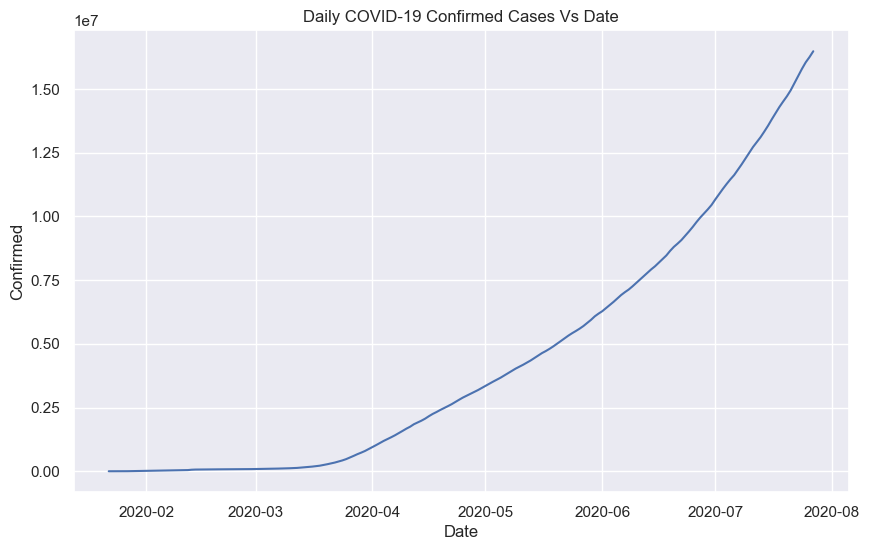

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data1, x='Date', y='Confirmed')
plt.title('Daily COVID-19 Confirmed Cases Vs Date')
plt.show()

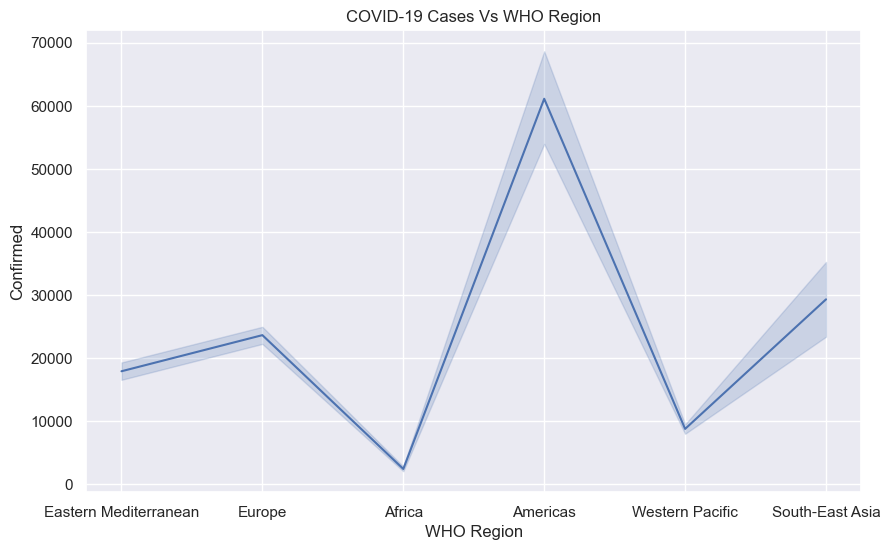

In [29]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data2, x='WHO Region', y='Confirmed')
plt.title('COVID-19 Cases Vs WHO Region')
plt.show()

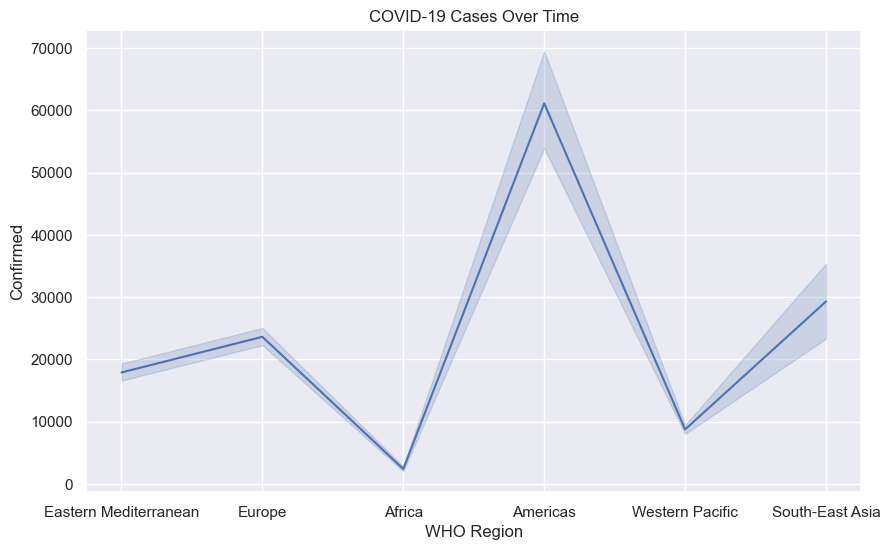

In [30]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data2, x='WHO Region', y='Confirmed')
plt.title('COVID-19 Cases Over Time')
plt.show()

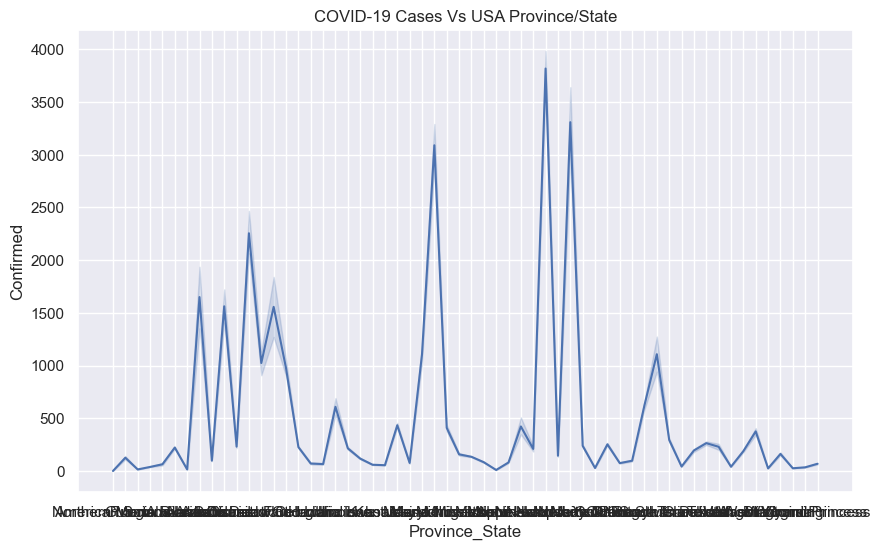

In [31]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data3, x='Province_State', y='Confirmed')
plt.title('COVID-19 Cases Vs USA Province/State')
plt.show()

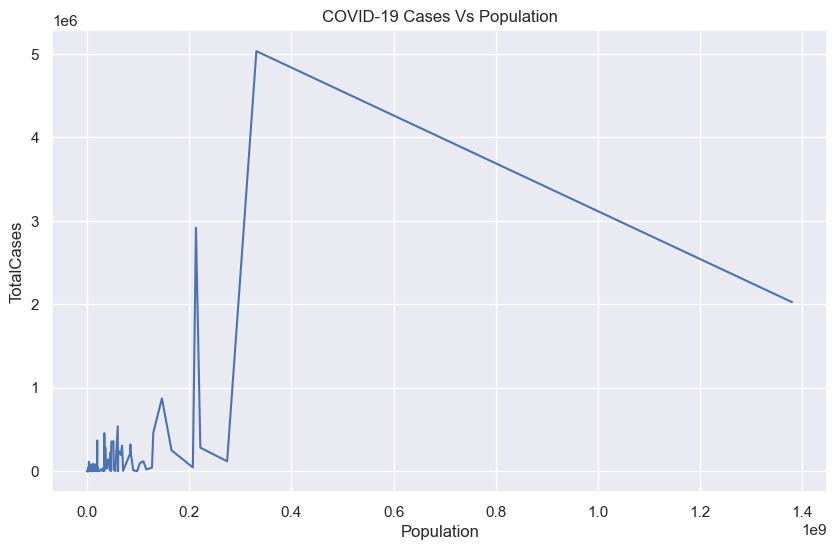

In [32]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data4, x='Population', y='TotalCases')
plt.title('COVID-19 Cases Vs Population')
plt.show()

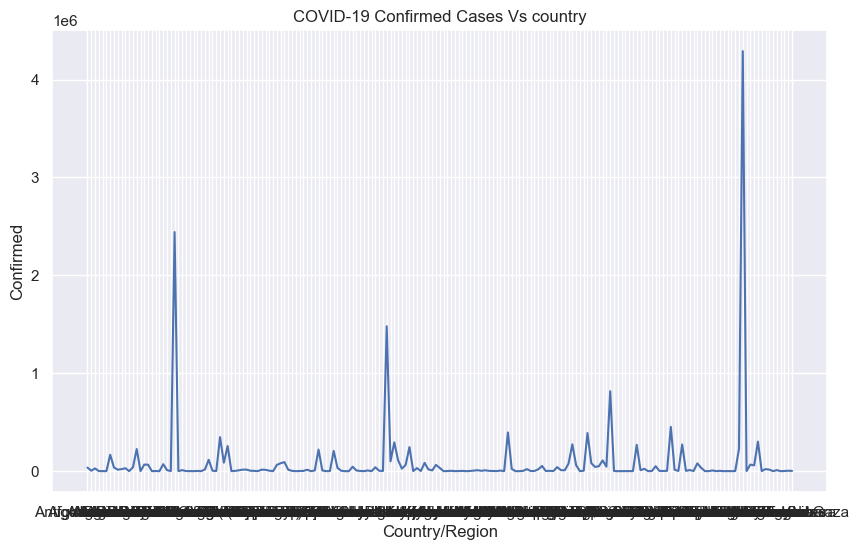

In [33]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data5, x='Country/Region', y='Confirmed')
plt.title('COVID-19 Confirmed Cases Vs country')
plt.show()

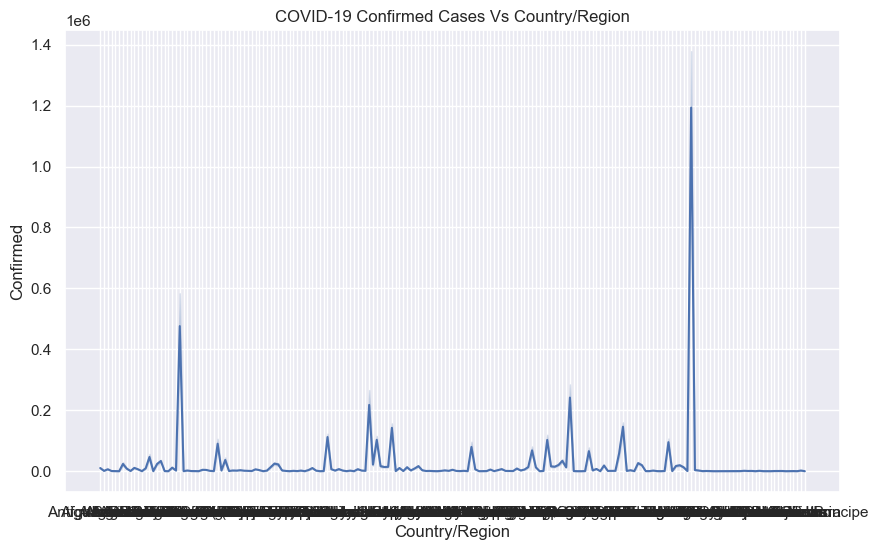

In [34]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data6, x='Country/Region', y='Confirmed')
plt.title('COVID-19 Confirmed Cases Vs Country/Region')
plt.show()

# First, let's check the actual column names in the dataframe
print(data4.columns.tolist())

# Then plot with the correct column name
# Assuming your date column might be named differently, like 'date' (lowercase) or 'timestamp'
plt.figure(figsize=(10,6))
sns.lineplot(data=data4, x=data4.columns[0], y='Confirmed')  # Using first column as x-axis (assuming it's the date)
plt.title('COVID-19 Cases Over Time')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

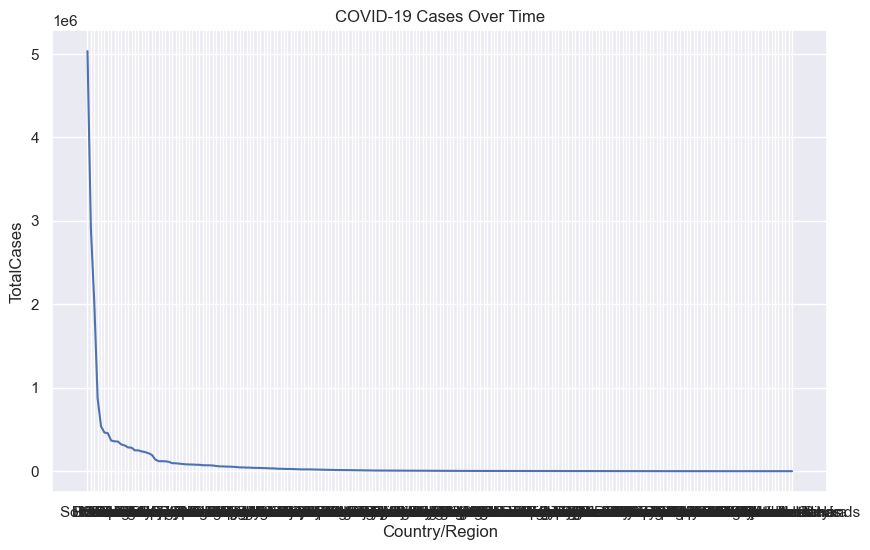

In [35]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data4, x='Country/Region', y='TotalCases')
plt.title('COVID-19 Cases Over Time')
plt.show()

***EDA Plots***

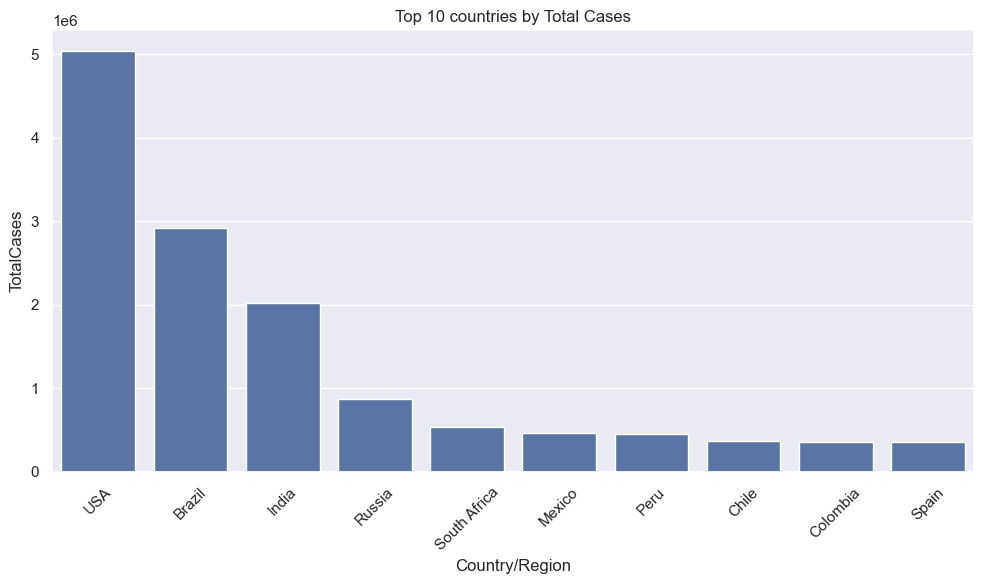

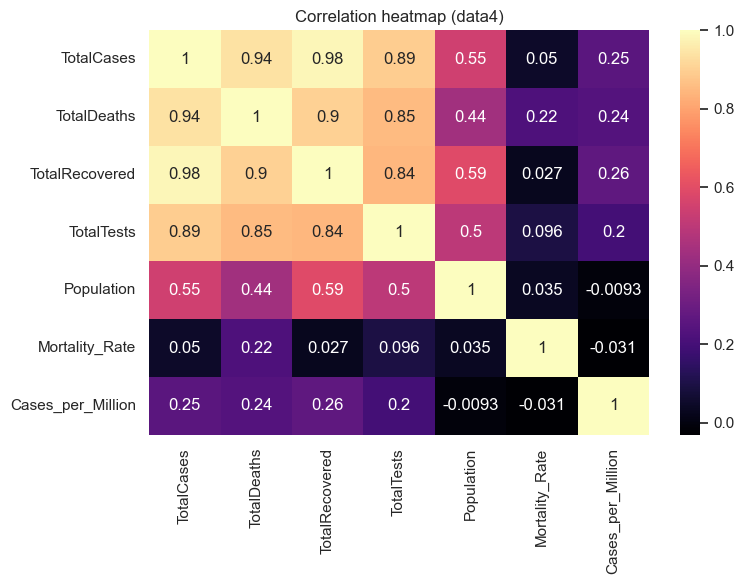

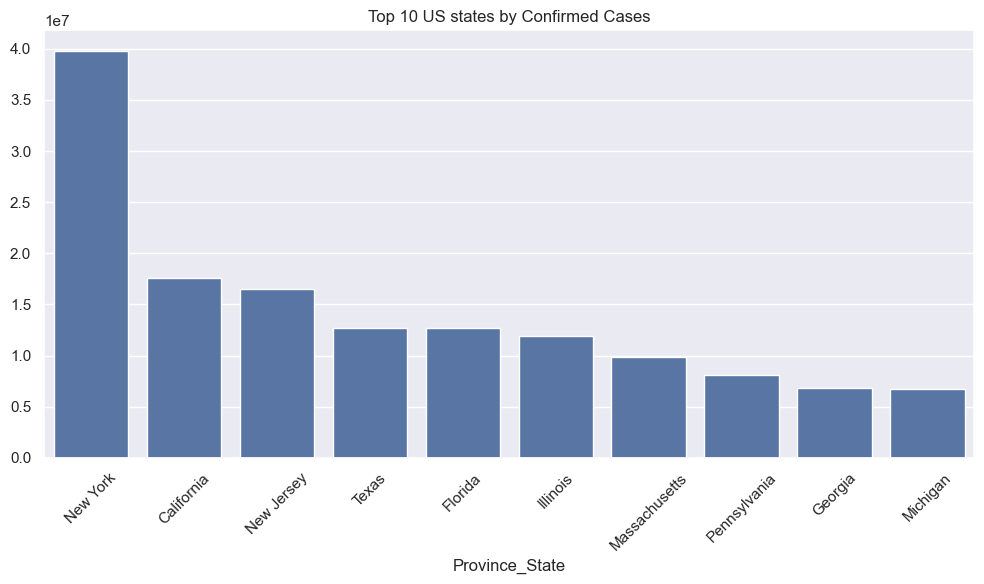

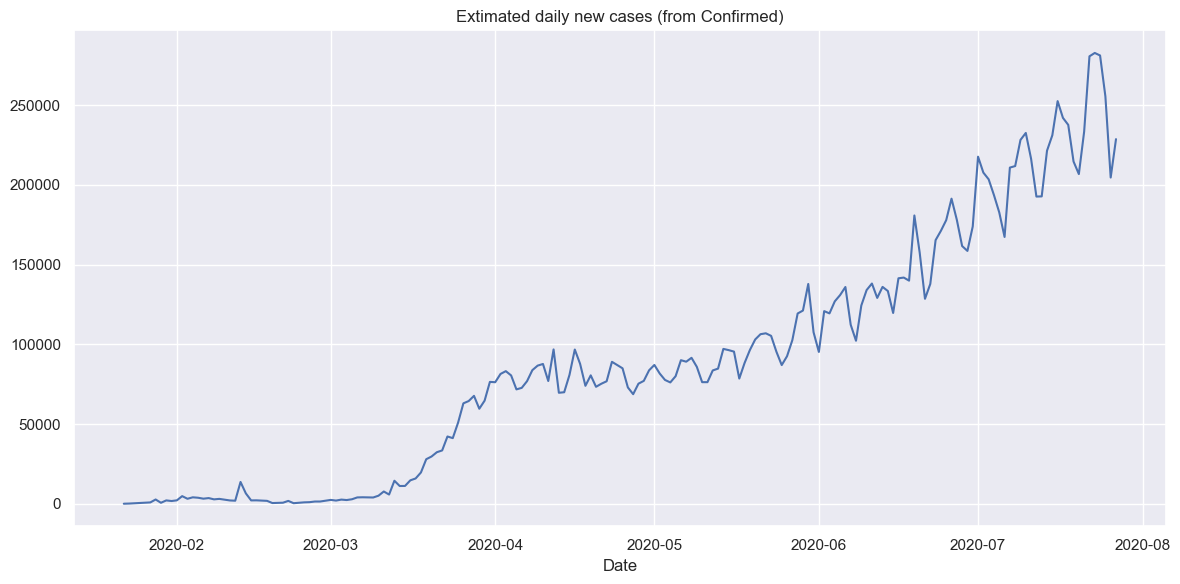

In [36]:
# Top 10 Countries by TotalCases
if data4 is not None and 'TotalCases' in data4.columns:
    top10 = data4.sort_values('TotalCases', ascending=False).head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x='Country/Region', y='TotalCases', data=top10)
    plt.xticks(rotation=45)
    plt.title('Top 10 countries by Total Cases')
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, 'top10_countries_totalcases.png'))
    plt.show()


# Correlation Heatmap
if data4 is not None:
    cols = [c for c in ['TotalCases','TotalDeaths','TotalRecovered','TotalTests','Population','Mortality_Rate','Cases_per_Million'] if c in data4.columns]
    if len(cols) > 1:
        corr = data4[cols].corr()
        plt.figure(figsize=(8,6))
        sns.heatmap(corr, annot=True, cmap='magma')
        plt.title('Correlation heatmap (data4)')
        plt.tight_layout()
        plt.savefig(os.path.join(OUTPUT_DIR, 'world_correlation.png'))
        plt.show()

# USA States
if data3 is not None:
    state_col = None
    for c in ['Province_State']:
        if c in data3.columns:
            state_col = c
            break
    if state_col and 'Confirmed' in data3.columns:
        data3 = data3.groupby(state_col)['Confirmed'].sum().sort_values(ascending=False).head(10)
        plt.figure(figsize=(10,6))
        sns.barplot(x=data3.index.astype(str), y=data3.values)
        plt.xticks(rotation=45)
        plt.title('Top 10 US states by Confirmed Cases')
        plt.tight_layout()
        plt.savefig(os.path.join(OUTPUT_DIR, 'usa_top10_states_confirmed.png'))
        plt.show()

# Day-wise series (estimation daily
if data1 is not None:
    date_col = None
    for c in data1.columns:
        if 'date' in c.lower() or c.lower()=='date':
            date_col = c
            break
    if date_col:
        try:
            data1[date_col] = pd.to_datetime(data1[date_col], errors='coerce')
            if 'Confirmed' in data1.columns:
                agg = data1.groupby(date_col)['Confirmed'].sum().reset_index()
                agg = data1.groupby(date_col)['Confirmed'].sum().sort_index()
                daily = agg.diff().fillna(0)
                plt.figure(figsize=(12,6))
                sns.lineplot(x=daily.index, y=daily.values)
                plt.title('Extimated daily new cases (from Confirmed)')
                plt.tight_layout()
                plt.savefig(os.path.join(OUTPUT_DIR, 'daywise_daily_cases.png'))
                plt.show()
        except Exception as e:
            print('data1 plotting error:', e)



***More EDA Visuals***

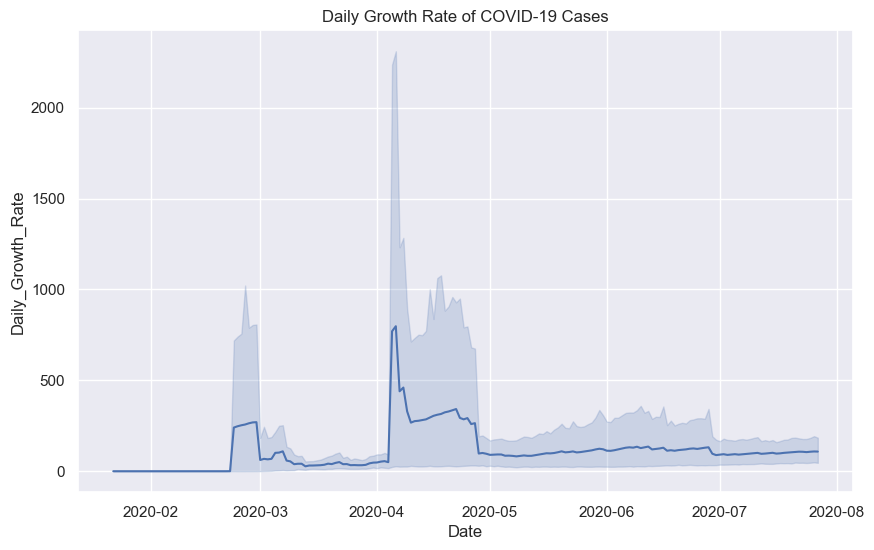

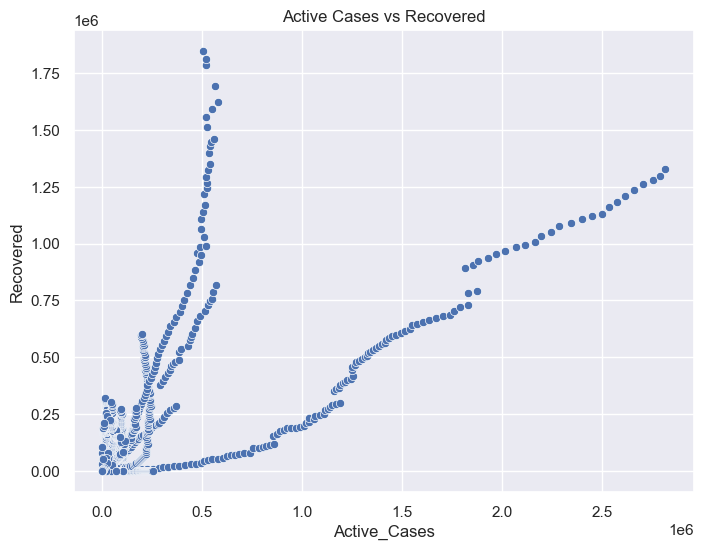

In [37]:
# Daily growth trend
plt.figure(figsize=(10,6))
sns.lineplot(data=data2, x='Date', y='Daily_Growth_Rate')
plt.title('Daily Growth Rate of COVID-19 Cases')
plt.savefig(os.path.join(OUTPUT_DIR, 'daily_growth_rate.png'), bbox_inches='tight', dpi=300)
plt.show()

# Active vs Recovered scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=data2, x='Active_Cases', y='Recovered')
plt.title('Active Cases vs Recovered')
plt.savefig(os.path.join(OUTPUT_DIR, 'active_va_recovered.png'), bbox_inches='tight', dpi=300)
plt.show()

In [38]:
type(data3)

pandas.core.series.Series

In [39]:
#print(data3.columns)

In [40]:
if isinstance(data3, pd.Series):
    data3 = data3.to_frame().reset_index()

***Model Development***

In [41]:
# Simple Linear Regression Model

#mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
#print("RMSE:", rmse)

In [52]:
# Predict TotalCases using TotalDeaths, TotalRecovered, TotalTests, Population (if available)
model_report = {}
if data4 is not None:
    features = [c for c in ['TotalDeaths','TotalRecovered','TotalTests','Population'] if c in data4.columns]
    target = None
    for t in ['TotalCases','Confirmed']:
        if t in data4.columns:
            target = t
            break
    if target and len(features) > 0:
        model_df = data4[features + [target]].dropna()
        if model_df.shape[0] >= 20:
            x = model_df[features].values
            y = model_df[target].values
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
            reg = LinearRegression().fit(x_train, y_train)
            y_pred = reg.predict(x_test)
            rmse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            model_report = {'features': features, 'target': target, 'n_rows': model_df.shape[0], 'rmse': float(rmse), 'r**2': float(r2)}
            print('Model trained. RMSE:', rmse, 'R**2:', r2)
            plt.figure(figsize=(8,6))
            plt.scatter(y_test, y_pred)
            plt.xlabel('Actual')
            plt.ylabel('Predicted')
            plt.title('Actual vs Predicted')
            plt.tight_layout()
            plt.savefig(os.path.join(OUTPUT_DIR, 'model_actual_vs_predicted.png'))
            coef_df = pd.DataFrame({'feature': features, 'coefficient': reg.coef_})
            coef_df.to_csv(os.path.join(OUTPUT_DIR, 'model_coefficients.csv'), index=False)
        else:
            print('Not enough rows for modeling after dropna:', model_df.shape[0])
    else:
        print('Missing target or features for modeling in data4')
else:
    print('data4 not loaded; skipped modeling')
print('Model report:', model_report)

Model trained. RMSE: 3050478443.353962 R**2: 0.5082220140659901
Model report: {'features': ['TotalDeaths', 'TotalRecovered', 'TotalTests', 'Population'], 'target': 'TotalCases', 'n_rows': 209, 'rmse': 3050478443.353962, 'r**2': 0.5082220140659901}


#adding a classification or Time-Series Model*

***Time-Series Forecast (using Linear Regression as trend***

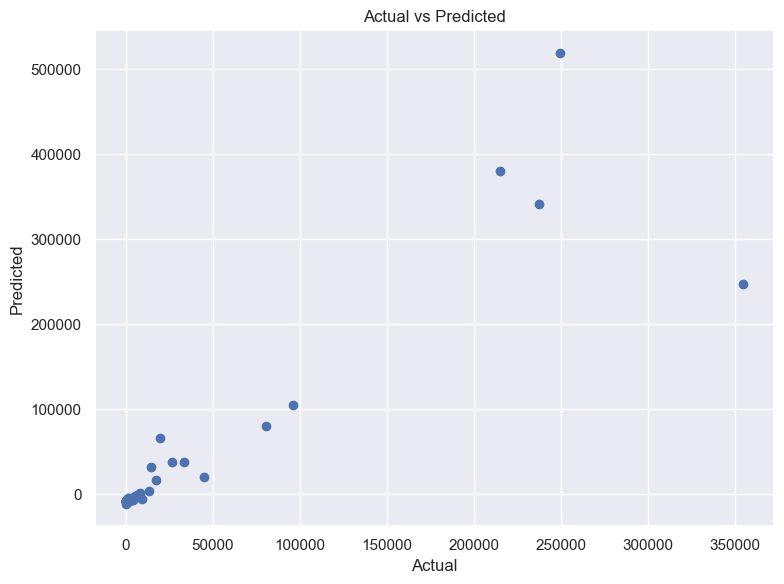

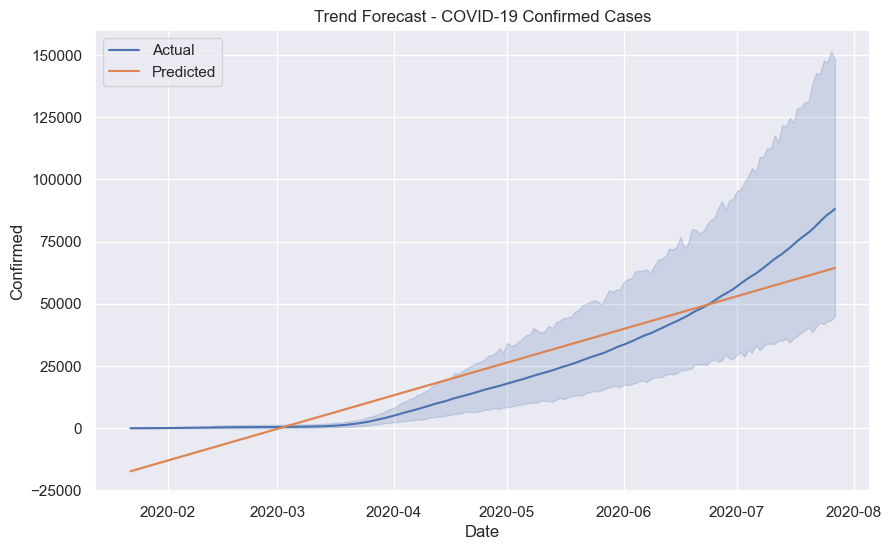

MAE: 38116.55253176512


In [43]:
# Simple time-series style model
ts_data = data2[['Date', 'Confirmed']].dropna().copy()
ts_data['Days'] = (ts_data['Date'] - ts_data['Date'].min()).dt.days
x = ts_data[['Days']]
y = ts_data['Confirmed']

model = LinearRegression().fit(x, y)
ts_data['Predicted'] = model.predict(x)

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='Confirmed', data=ts_data, label='Actual')
sns.lineplot(x='Date', y='Predicted', data=ts_data, label='Predicted')
plt.title('Trend Forecast - COVID-19 Confirmed Cases')
plt.savefig(os.path.join(OUTPUT_DIR, 'trend_forecast.png'), bbox_inches='tight', dpi=300)
plt.show()

print("MAE:", mean_absolute_error(y, ts_data['Predicted']))

***OR Classification (High vs Low Mortality Risk)***

In [54]:
# Create a binary classification target
data4['High_Risk'] = (data4['Mortality_Rate'] > data4['Mortality_Rate'].median()).astype(int)

features = ['TotalDeaths','TotalRecovered','TotalTests','Population']
x = data4[features].fillna(0)
y = data4['High_Risk']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42).fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7857142857142857
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        23
           1       0.78      0.74      0.76        19

    accuracy                           0.79        42
   macro avg       0.78      0.78      0.78        42
weighted avg       0.79      0.79      0.79        42



In [45]:
#x1 = data1[['Recovered' , 'Deaths']]
#y1 = data1['Confirmed']

#x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)
#model1 = LinearRegression()
#model1.fit(x1_train, y1_train)

#y1_pred = model1.predict(x1_test)
#print("RMSE:", np.sqrt(mean_squared_error(y1_test, y1_pred)))
#print("R**2:", r2_score(y1_test, y1_pred))

In [46]:
#x2 = data2[['Recovered' , 'Deaths']]
#y2 = data2['Confirmed']

#x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)
#model2 = LinearRegression()
#model2.fit(x2_train, y2_train)

#y2_pred = model2.predict(x2_test)
#print("RMSE:", np.sqrt(mean_squared_error(y2_test, y2_pred)))
#print("R**2:", r2_score(y2_test, y2_pred))

In [47]:
#x3 = data3[['Recovered' , 'Deaths']]
#y3 = data3['Confirmed']

#x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=42)
#model3 = LinearRegression()
#model3.fit(x3_train, y3_train)

#y3_pred = model3.predict(x3_test)
#print("RMSE:", np.sqrt(mean_squared_error(y3_test, y3_pred)))
#print("R**2:", r2_score(y3_test, y3_pred))

In [48]:
#x4 = data4[['Recovered' , 'Deaths']]
#y4 = data4['TotalCases']

#x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=42)
#model4 = LinearRegression()
#model4.fit(x4_train, y4_train)

#y4_pred = model4.predict(x4_test)
#print("RMSE:", np.sqrt(mean_squared_error(y4_test, y4_pred)))
#print("R**2:", r2_score(y4_test, y4_pred))

***Evaluation Section***

## Model Evaluation

- **Regression Model (RMSE, R**2)** - Measures predictive accuracy on case counts.
- **Classification Model (Accuracy, F1-score)** - Evaluates public health risk identification.
- **Time_Series Forecast (MAE)** - Quantifies how well future cases are predicted.

***Save Summary***

In [49]:
summary_lines = []
if data4 is not None:
    summary_lines.append(f"data4 shape: {data4.shape}")
if data3 is not None:
    summary_lines.append(f"data3 shape: {data3.shape}")
if data1 is not None:
    summary_lines.append(f"data1 shape: {data1.shape}")
if data2 is not None:
    summary_lines.append(f"data2 shape: {data2.shape}")
if data5 is not None:
    summary_lines.append(f"data5 shape: {data5.shape}")
if data6 is not None:
    summary_lines.append(f"data6 shape: {data6.shape}")
if model_report:
    summary_lines.append("MODEL SUMMARY:")
    for k,v in model_report.items():
        summary_lines.append(f"{k}: {v}")


# Enriching the summary file by including (quick_summary.txt)
summary_lines.append(f"Daily Growth Rate mean: {data2['Daily_Growth_Rate'].mean():.4f}")
summary_lines.append(f"Classification Accuracy: {accuracy_score(y_test, y_pred):.2f}")



with open(os.path.join(OUTPUT_DIR, 'quick_summary.txt'), 'w', encoding='utf-8') as f:
    f.write('\n'.join(summary_lines))

print('Quick summary saved to outputs folder')
    

Quick summary saved to outputs folder


***View Summary***

In [50]:
with open(summary_path, "r") as f:
    content = f.read()
    print(content)

data4 shape: (209, 19)
data3 shape: (10, 2)
data1 shape: (188, 12)
data2 shape: (35156, 12)
data5 shape: (187, 15)
data6 shape: (49068, 12)
MODEL SUMMARY:
features: ['TotalDeaths', 'TotalRecovered', 'TotalTests', 'Population']
target: TotalCases
n_rows: 209
rmse: 3050478443.353962
r2: 0.5082220140659901
Daily Growth Rate mean: inf
Classification Accuracy: 0.79
